<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">
 
# Logistic Regression
 
_Authors: Multiple_
 
---

<a id="learning-objectives"></a>
### Learning Objectives
- Recall how to perform linear regression in scikit-learn
- Demonstrate why logistic regression is a better alternative for classification than linear regression
- Overview probability, odds, e, log, and log-odds
- Explain how logistic regression works
- Interpret logistic regression coefficients
- Use logistic regression with categorical features
- Compare logistic regression with other models
- Examine a few different metrics for evaluating classifier models
- Construct a confusion matrix based on predicted classes

### Lesson Guide
- [Refresher: Fitting and Visualizing a Linear Regression using scikit-learn](#refresher-fitting-and-visualizing-a-linear-regression-using-scikit-learn)
- [Refresher: Interpreting Linear Regression Coefficients](#refresher-interpreting-linear-regression-coefficients)
- [Predicting a Categorical Response](#predicting-a-categorical-response)
- [Using logistic regression for classification](#using-logistic-regression-for-classification)
- [Probability, odds ratio, e, log, and log-odds](#probability-odds-ratio-e-log-and-log-odds)
	- [Understanding e and the natural logarithm](#understanding-e-and-the-natural-logarithm)
	- [The log-odds ratio](#the-log-odds-ratio)
- [What is Logistic Regression?](#what-is-logistic-regression)
- [Interpreting Logistic Regression Coefficients](#interpreting-logistic-regression-coefficients)
- [Using Logistic Regression with Categorical Features](#using-logistic-regression-with-categorical-features)
- [Comparing Logistic Regression to Other Models](#comparing-logistic-regression-to-other-models)
- [Advanced Classifcation Metrics](#advanced-classifcation-metrics)
	- [Accuracy, True Positive Rate, and False Negative Rate](#accuracy-true-positive-rate-and-false-negative-rate)


<a id="refresher-fitting-and-visualizing-a-linear-regression-using-scikit-learn"></a>
## Refresher: Fitting and Visualizing a Linear Regression using scikit-learn
---

Load in the glass attribute data from the UCI machine learning website with pandas. The columns are different measurements of properties of glass that can be used to identify the glass type. For full detailed information on the columns in this dataset [please see the included .names file](http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.names).

In [1]:
# glass identification dataset
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
glass.sort_values('al', inplace=True)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1


**Pretend that we want to predict `ri`, and our only feature is `al`. How could we do it using machine learning?**

<!--
**Answer:** We could frame it as a regression problem, and use a linear regression model with **al** as the only feature and **ri** as the response.
-->

**How would we visualize this model?**
<!--
**Answer:** Create a scatter plot with **al** on the x-axis and **ri** on the y-axis, and draw the line of best fit.
-->

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5);

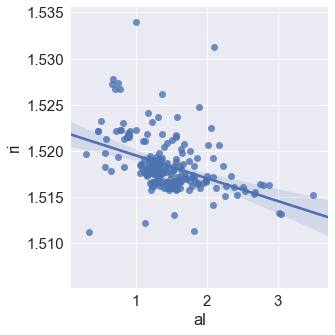

In [3]:
sns.lmplot(x='al', y='ri', data=glass);

**How can we draw this plot (just the points - don't worry about the regression line) without using Seaborn?**

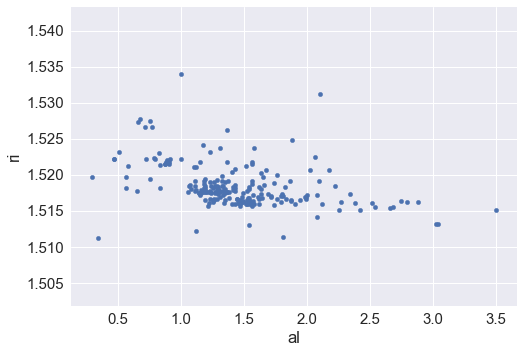

In [4]:
# scatter plot using Pandas
glass.plot(kind='scatter', x='al', y='ri')

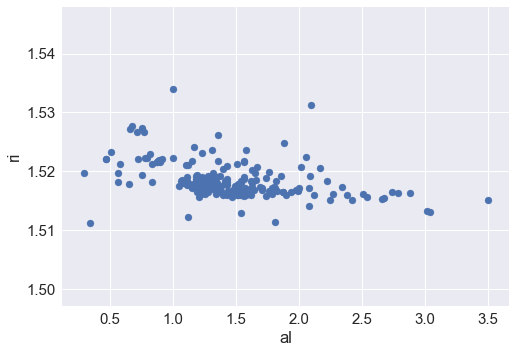

In [5]:
# equivalent scatter plot using Matplotlib
plt.scatter(glass.al, glass.ri)
plt.xlabel('al')
plt.ylabel('ri')

To build a linear regression model to predict `ri` using scikit-learn we will need to import the `LinearRegression` class from the `linear_model` submodule. 

**Using `LinearRegression` fit a model predicting `ri` from `al` (and an intercept).**

In [6]:
# fit a linear regression model (name the model linreg)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

feature_cols = ['al']
X = glass[feature_cols]
y = glass.ri

linreg.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Using the `LinearRegression` object that we have fit, create a variable that are our predictions for `ri` for each row's `al` in the dataset. 

In [7]:
# make predictions for all values of X and add back to the original dataframe
y_pred = linreg.predict(X)
glass['y_pred'] = y_pred

**Plot the predicted `ri` against each `al` as a line.**

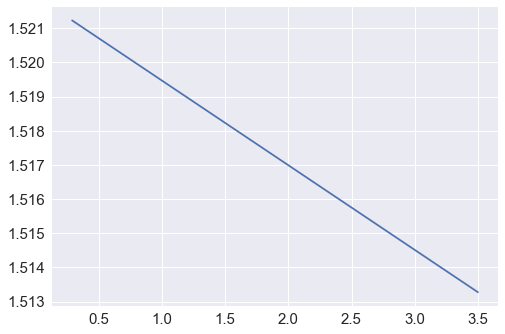

In [8]:
# plot those predictions connected by a line (try plt.plot())
plt.plot(glass.al, glass.y_pred)


**Plot this regression line with the scatter points on the same chart.**

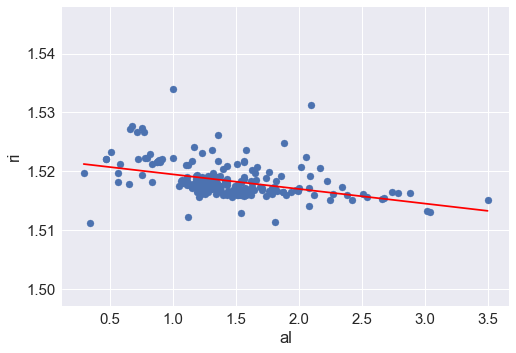

In [9]:
# put the plots together (use a scatter and line graph)
plt.scatter(glass.al, glass.ri)
plt.plot(glass.al, glass.y_pred, color='red')
plt.xlabel('al')
plt.ylabel('ri')

<a id="refresher-interpreting-linear-regression-coefficients"></a>
## Refresher: Interpreting Linear Regression Coefficients
---

Recall the simple linear regression equation is $y = \beta_0 + \beta_1x$

Where $\beta_0$ is the intercept and $\beta_1$ is, in this case, our coefficient on the `al` predictor.

**Print out the intercept and coefficient values from our fit `LinearRegression` object.**

In [10]:
print linreg.intercept_
print linreg.coef_

1.52194533024
[-0.00247761]


**Manually compute the predicted value of `ri` when `al=2.0` using the regression equation.**

In [11]:
# compute prediction for al=2 using the equation
linreg.intercept_ + linreg.coef_[0] * 2

1.5169901174637033

**Confirm that this is the same value we would get when using the built-in `.predict()` method of the `LinearRegression` object.**

In [12]:
# compute prediction for al=2 using the predict method
linreg.predict(2)

array([ 1.51699012])

**Coefficient interpretation:** A 1 unit increase in `al` is associated with a ~0.0025 unit decrease in `ri`.

**Intercept interpretation:** when `al = 0` the estimated value of `ri` is 1.52194533024

In [13]:
# increasing al by 1 (so that al=3) decreases ri by 0.0025
1.51699012 - 0.0024776063874696243

1.5145125136125304

<a id="predicting-a-categorical-response"></a>
## Predicting a Categorical Response
---

Linear regression is appropriate when we want to predict the value of a continuous target/response variable, but what about when we want to predict membership in a class or category?

**Examine the glass type column in the dataset. What are the counts in each category?**

In [14]:
# examine glass_type
glass.glass_type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

Say these types are subdivisions of broader glass types:

> **Window glass:** types 1, 2, and 3

> **Household glass:** types 5, 6, and 7

**Create a new `household` column that indicates whether a row is household glass or not, coded as 1 or 0 respectively.**

In [15]:
# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household
id,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0


Let's change our task, so that we're predicting the **`household`** category using **`al`**. Let's visualize the relationship to figure out how to do this.

**Make a scatterplot comparing `al` and `household`.**

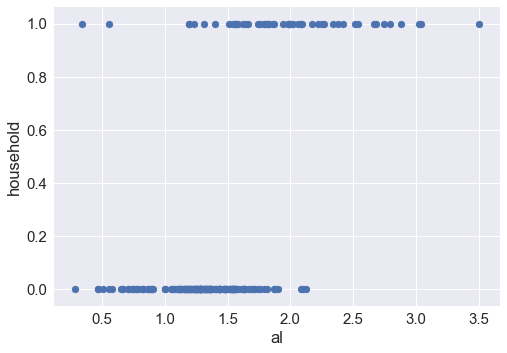

In [16]:
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

**Fit a new `LinearRegression` predicting `household` from `al`.**

Let's draw a regression line like we did before:

In [17]:
# fit a linear regression model and store the predictions
feature_cols = ['al']
X = glass[feature_cols] 
y = glass.household 
linreg.fit(X, y)
glass['household_pred'] = linreg.predict(X)

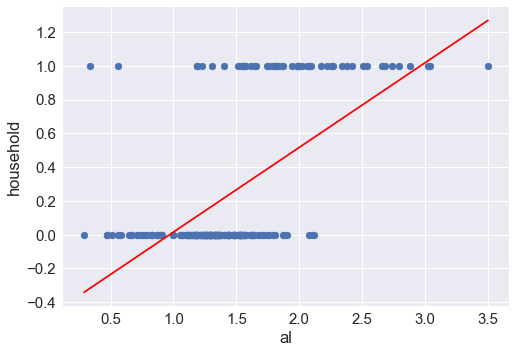

In [18]:
# scatter plot that includes the regression line
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

If **al=3**, what class do we predict for household? **1**

If **al=1.5**, what class do we predict for household? **0**

We predict the 0 class for **lower** values of al, and the 1 class for **higher** values of al. What's our cutoff value? Around **al=2**, because that's where the linear regression line crosses the midpoint between predicting class 0 and class 1.

Therefore, we'll say that if **household_pred >= 0.5**, we predict a class of **1**, else we predict a class of **0**.

**Using this threshold, create a new column of our predictions for whether a row is household glass.**

In [19]:
# understanding np.where
import numpy as np
nums = np.array([5, 15, 8])

# np.where returns the first value if the condition is True, and the second value if the condition is False
np.where(nums > 10, 'big', 'small')

array(['small', 'big', 'small'], 
      dtype='|S5')

In [20]:
# transform household_pred to 1 or 0
glass['household_pred_class'] = np.where(glass.household_pred >= 0.5, 1, 0)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household,household_pred,household_pred_class
id,,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0,-0.340495,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1,-0.315436,0
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0,-0.230236,0


**Plot a line that shows our predictions for class membership in household vs. not.**

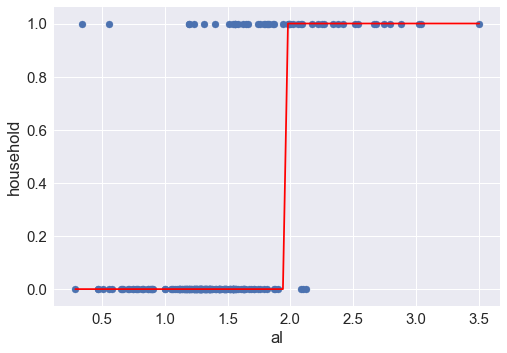

In [21]:
# plot the class predictions
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')

<a id="using-logistic-regression-for-classification"></a>
## Using logistic regression for classification
---

Logistic regression is a more appropriate method for what we just did with a linear regression. The values output from a linear regression cannot be interpreted as probabilities of class membership since their values can be greater than 1 and less than 0. Logistic regression, on the other hand, ensures that the values output as predictions can be interpreted as probabilities of class membership.

**Import the `LogisticRegression` class from `linear_model` below and fit the same regression model predicting `household` from `al`.**

In [22]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

feature_cols = ['al']
X = glass[feature_cols]
y = glass.household

logreg.fit(X,y)
pred = logreg.predict(X)


**Plot the predicted class using the logistic regression as we did for the linear regression predictions above.**

As you can see the class predictions are the same.

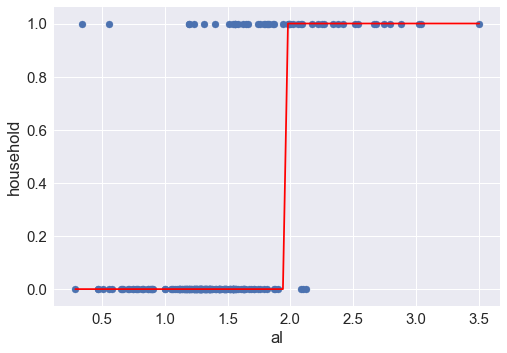

In [23]:
# plot the class predictions
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')

What if we wanted the **predicted probabilities** instead of just the **class predictions**, to understand how confident we are in a given prediction?

**Using the built-in `.predict_proba()` function, examine the predicted probabilities for the first handful of rows of `X`.**

In [24]:
logreg.predict_proba(X)[0:10]

array([[ 0.97193375,  0.02806625],
       [ 0.96905681,  0.03094319],
       [ 0.96017962,  0.03982038],
       [ 0.96017962,  0.03982038],
       [ 0.9569876 ,  0.0430124 ],
       [ 0.95265323,  0.04734677],
       [ 0.95265323,  0.04734677],
       [ 0.95080573,  0.04919427],
       [ 0.94378757,  0.05621243],
       [ 0.94271112,  0.05728888]])

Sklearn orders the columns according to our class labels. The two-column output of `predict_proba` returns a column for each class of our `household` variable. The first column is the probability of `household=0` for a given row, and the second column is the probability of `household=1`.

**Store the predicted probabilities of class=1 in its own colun in the dataset.**

In [25]:
# store the predicted probabilites of class 1
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

**Plot the predicted probabilities as a line on our plot (probability of `household=1` as `al` changes).**

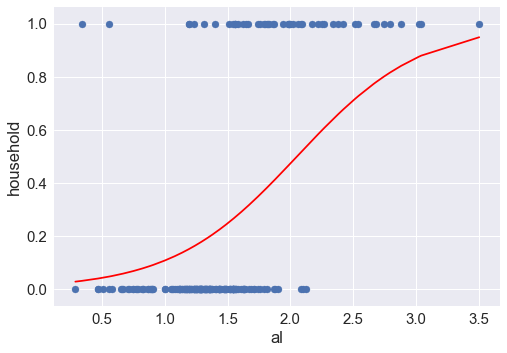

In [26]:
# plot the predicted probabilities
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [27]:
# examine some example predictions
print logreg.predict_proba(1)
print logreg.predict_proba(2)
print logreg.predict_proba(3)

[[ 0.89253652  0.10746348]]
[[ 0.52645662  0.47354338]]
[[ 0.12953623  0.87046377]]


<a id="probability-odds-ratio-e-log-and-log-odds"></a>
## Probability, odds ratio, e, log, and log-odds
---

To understand how logistic regression predicts the probability of class membership we need to start by understanding the relationship between probability, odds ratios, and log-odds ratios.

$$probability = \frac {one\ outcome} {all\ outcomes}$$

$$odds = \frac {one\ outcome} {all\ other\ outcomes}$$

Examples:

- Dice roll of 1: probability = 1/6, odds = 1/5
- Even dice roll: probability = 3/6, odds = 3/3 = 1
- Dice roll less than 5: probability = 4/6, odds = 4/2 = 2

$$odds = \frac {probability} {1 - probability}$$

$$probability = \frac {odds} {1 + odds}$$

**As an example we can create a table of probabilities vs. odds below.**

In [28]:
# create a table of probability versus odds
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})
table['odds'] = table.probability/(1 - table.probability)
table

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000


<a id="understanding-e-and-the-natural-logarithm"></a>
### Understanding e and the natural logarithm

What is **e**? It is the base rate of growth shared by all continually growing processes:

In [29]:
# exponential function: e^1
np.exp(1)

2.7182818284590451

What is a **(natural) log**? It gives you the time needed to reach a certain level of growth:

In [30]:
# time needed to grow 1 unit to 2.718 units
np.log(2.718)

0.99989631572895199

It is also the **inverse** of the exponential function:

In [31]:
np.log(np.exp(5))

5.0

<a id="the-log-odds-ratio"></a>
### The log-odds ratio

When we take the logarithm of the odds ratio we get what is known as the log-odds. This may seem like an arbitrary transformation, but it has an important property: the log-odds has the range $[-\infty, \infty]$. This is not true for the odds ratio, which can never be a negative number.

In [32]:
# add log-odds to the table
table['logodds'] = np.log(table.odds)
table

,probability,odds,logodds
0,0.10,0.111111,-2.197225
1,0.20,0.250000,-1.386294
2,0.25,0.333333,-1.098612
3,0.50,1.000000,0.000000
4,0.60,1.500000,0.405465
5,0.80,4.000000,1.386294
6,0.90,9.000000,2.197225


<a id="what-is-logistic-regression"></a>
## What is Logistic Regression?
---

**Linear regression:** continuous response is modeled as a linear combination of the features:

$$y = \beta_0 + \beta_1x$$

**Logistic regression:** log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

This is called the **logit function**.

Probability is sometimes written as pi:

$$\log \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x$$

The equation can be rearranged into the **logistic function**:

$$\pi = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

In other words:

- Logistic regression outputs the **probabilities of a specific class**
- Those probabilities can be converted into **class predictions**

The **logistic function** has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1

We have covered how this works for **binary classification problems** (two response classes). But what about **multi-class classification problems** (more than two response classes)?

- Most common solution for classification models is **"one-vs-all"** (also known as **"one-vs-rest"**): decompose the problem into multiple binary classification problems
- **Multinomial logistic regression** on the other hand can solve this as a single problem, but how this works is beyond the scope of this lesson.

<a id="interpreting-logistic-regression-coefficients"></a>
## Interpreting Logistic Regression Coefficients

---

Logistic regression coefficients are not as immediately interpretable as the coefficients from a linear regression. To interpret the coefficients we need to remember how the formulation for logistic regression differs from linear regression.

**First lets plot our logistic regression predicted probability line again.**

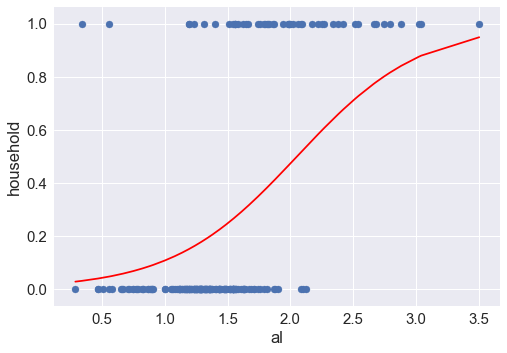

In [33]:
# plot the predicted probabilities again
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

Remember that

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

Meaning that we will get out the *log-odds* if we compute the intercept plus the coefficient times a value for `al`.

**Compute the log-odds of `household` when `al=2`.**

In [34]:
# compute predicted log-odds for al=2 using the equation
logodds = logreg.intercept_ + logreg.coef_[0] * 2
logodds

array([-0.10592543])

Now that we have the log-odds, we will need to go through the process of converting these log-odds to probability.

**Convert the log-odds to odds, then the odds to probability.**

In [35]:
# convert log-odds to odds
odds = np.exp(logodds)
odds

array([ 0.89949172])

In [36]:
# convert odds to probability
prob = odds/(1 + odds)
prob

array([ 0.47354338])

This finally gives us the predicted probability of `household=1` when `al=2`. You can confirm this is the same as the value you would get out of the `.predict_proba()` method of the sklearn object.

In [37]:
# compute predicted probability for al=2 using the predict_proba method
logreg.predict_proba(2)[:, 1]

array([ 0.47354338])

In [38]:
# examine the coefficient for al
zip(feature_cols, logreg.coef_[0])

[('al', 2.0109909641729442)]

In [39]:
# print the intercept
logreg.intercept_

array([-4.12790736])

**Interpretation:** A 1 unit increase in `al` is associated with a 2.01 unit increase in the log-odds of `household`.

In [42]:
# increasing al by 1 (so that al=3)
logodds = -4.12790736 + 2.0109909641729442*3
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

0.8704637704833843

In [43]:
# compute predicted probability for al=3 using the predict_proba method
logreg.predict_proba(3)[:, 1]

array([ 0.87046377])

**Bottom line:** Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

In [45]:
# examine the intercept
logreg.intercept_

array([-4.12790736])

**Intercept interpretation:** For an `al` value of 0, the log-odds of `household` is -4.12790736.

In [46]:
# convert log-odds to probability
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

array([ 0.01586095])

That makes sense from the plot above, because the probability of household=1 should be very low for such a low 'al' value.

![Logistic regression beta values](./assets/images/logistic_betas.png)

Changing the $\beta_0$ value shifts the curve **horizontally**, whereas changing the $\beta_1$ value changes the **slope** of the curve.

<a id="using-logistic-regression-with-categorical-features"></a>
## Using Logistic Regression with Categorical Features
---

Logistic regression requires that the target variable be a class or category. We cannot use logistic regression when the target is continuous (that would be modeled with a regression). 

However, we can definitely use logistic regression when *features* are categorical. Below we walk through converting the `ba` column of continous measures into a binary variable indicating high vs. low `ba`, then using this as the predictor in a logistic regression.

In [47]:
glass.ba[0:10]

id
22     0.0
185    0.0
40     0.0
39     0.0
51     0.0
184    0.0
110    0.0
158    0.0
153    0.0
104    0.0
Name: ba, dtype: float64

**Create a binary variable `high_ba` where it is 1 if `ba` is greater than 0.5 and 0 otherwise.**

In [48]:
# create a categorical feature
glass['high_ba'] = np.where(glass.ba > 0.5, 1, 0)

**Let's use Seaborn to draw the logistic curve. Put the original `ba` on the x-axis and `household` on the y-axis.**

> **Note:** setting `logistic=True` in `.lmplot` will tell seaborn to fit a logistic regression instead of a linear regression. 

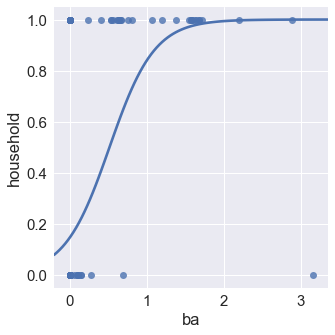

In [50]:
# original (continuous) feature
sns.lmplot(x='ba', y='household', data=glass, ci=None, logistic=True)

**Create the same plot but using the `high_ba` categorical predictor instead of `ba`.**

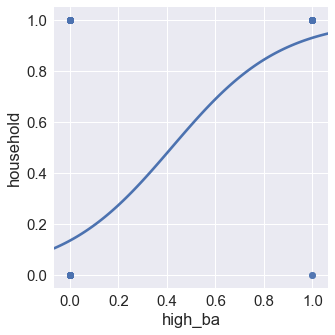

In [51]:
# categorical feature
sns.lmplot(x='high_ba', y='household', data=glass, ci=None, logistic=True)

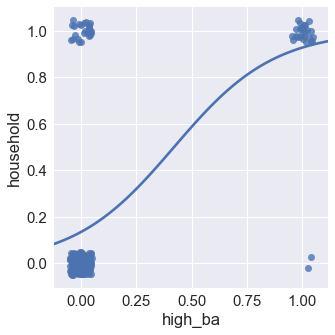

In [52]:
# categorical feature, with jitter added
sns.lmplot(x='high_ba', y='household', data=glass, ci=None, logistic=True, x_jitter=0.05, y_jitter=0.05)

As you can see, converting the continuous predictor to categorical changes the shape of our logistic curve dramatically. By converting to a binary feature we are certainly losing information contained in the `ba` variable.

**Fit a logistic regression predicting `household` from `high_ba` and interpret the coefficient.**

In [53]:
# fit a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

feature_cols = ['high_ba']
X = glass[feature_cols]
y = glass.household

logreg.fit(X, y)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [54]:
# examine the coefficient for high_ba
zip(feature_cols, logreg.coef_[0])

[('high_ba', 4.4273153450187213)]

**Interpretation:** Having a high 'ba' value is associated with a 4.43 unit increase in the log-odds of 'household' (as compared to a low 'ba' value).

<a id="comparing-logistic-regression-to-other-models"></a>
## Comparing Logistic Regression to Other Models
---

Advantages of logistic regression:

- Highly interpretable (if you remember how)
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations
- Outputs well-calibrated predicted probabilities

Disadvantages of logistic regression:

- Presumes a linear relationship between the features and the log-odds of the response
- Performance is (generally) not competitive with the best supervised learning methods
- Can't automatically learn feature interactions

<a id="advanced-classifcation-metrics"></a>
## Advanced Classifcation Metrics

---

When we evaluate the performance of a logistic regression (or any classifier model), the standard metric to use is accuracy: how many class labels did we guess correctly? However, accuracy is only one of several metrics we could use when evaluating a classification model.

$$Accuracy = \frac{total~predicted~correct}{total~predicted}$$

Accuracy alone doesn’t always give us a full picture.

If we know a model is 75% accurate, it doesn’t provide any insight into why the 25% was wrong.

Consider a binary classification problem where we have 165 observations/rows of people who are either smokers or non-smokers. 

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>

</table>

There are 60 in class 0, non-smokers, and 105 observations in class 1, smokers
<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>

</table>

We have 55 predictions of class, predicted as non-smoker and 110 of class 1, predicted to be a smoker

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

- **true positives (TP):** These are cases in which we predicted yes (smokers), and they actually are smokers.
- **true negatives (TN):** We predicted no, and they are non-smokers.
- **false positives (FP):** We predicted yes, but they were not actually smokers. (Also known as a "Type I error.")
- **false negatives (FN):** We predicted no, but they are smokers. (Also known as a "Type II error.")
<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center">TN = 50</td>
    <td style="text-align: center">FP = 10</td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center">TP = 100</td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>


**Categorize these as TP, TN, FP, FN:**

Try not to look at the answers above.
    
- We predict non-smoker, but the person is a smoker
- We predict non-smoker, and the person is a non-smoker
- We predict smoker and the person is a smoker
- We predict smoker and the persin is a non-smoker

<!--ANSWER
- FN
- TN
- TP
- FP
-->

<a id="accuracy-true-positive-rate-and-false-negative-rate"></a>
### Accuracy, True Positive Rate, and False Negative Rate

**Accuracy:** Overall, how often is the classifier correct?

<span>
    (<span style="color: green">TP</span>+<span style="color: red">TN</span>)/<span style="color: blue">total</span> = (<span style="color: green">100</span>+<span style="color: red">50</span>)/<span style="color: blue">165</span> = 0.91
</span>

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom; color: blue">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center; background-color: red">TN = 50</td>
    <td style="text-align: center">FP = 10</td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center; background-color: green">TP = 100</td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

**True Positive Rate (TPR)** asks, “Out of all of the target class labels, how many were accurately predicted to belong to that class?”

For example, given a medical exam that tests for cancer, how often does it correctly identify patients with cancer?

<span>
<span style="color: green">TP</span>/<span style="color: blue">actual yes</span> = <span style="color: green">100</span>/<span style="color: blue">105</span> = 0.95
</span>

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center">TN = 50</td>
    <td style="text-align: center">FP = 10</td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center;background-color: green">TP = 100</td>
    <td style="text-align: center;color: blue">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

**False Positive Rate (FPR)** asks, “Out of all items not belonging to a class label, how many were predicted as belonging to that target class label?”

For example, given a medical exam that tests for cancer, how often does it trigger a “false alarm” by incorrectly saying a patient has cancer?

<span>
<span style="color: orange">FP</span>/<span style="color: blue">actual no</span> = <span style="color: orange">10</span>/<span style="color: blue">60</span> = 0.17
</span>

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center">TN = 50</td>
    <td style="text-align: center;background-color: orange">FP = 10</td>
    <td style="text-align: center;color:blue">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center">TP = 100</td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

**Can you see that we might weigh TPR AND FPR differently depending on the sitution?**

- Give an example when we care about TPR, but not FPR
- Give an example when we care about FPR, but not TPR

<!--
ANSWER:
- During initial medical diagnosis, we want to be sensitive. We want intial screens to come up a lot of True Positives even if we get a lot of False Positives.
- If we are doing spam detection we want to be precise. Anything that we remove from an inbox must be spam, which may mean accepting fewer True Positives.
-->

**More trade-offs**

The true positive and false positive rates gives us a much clearer pictures of where predictions begin to fall apart.

This allows us to adjust our models accordingly.

**Below we will load in some data on admissions to college.**

In [55]:
import pandas as pd
from sklearn import linear_model, model_selection, metrics

admissions = pd.read_csv('./assets/dataset/admissions.csv')
admissions = admissions.dropna()
# get dummy variables for prestige
admissions = admissions.join(pd.get_dummies(admissions['prestige'], prefix='prestige'))

**We can predict the `admit` class from `gre` and use a train-test split to evaluate the performance of our model on a held-out test set.**

In [56]:
X = admissions[['gre']]
y = admissions['admit']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=46)
logit_simple = linear_model.LogisticRegression(C=1e9).fit(X_train, y_train)

**Recall that our "baseline" accuracy is the proportion of the majority class label.**

In [57]:
1. - y_train.mean()

0.696969696969697

In [60]:
# what is our accuracy on the test set?
print np.mean(y_test == logit_simple.predict(X_test))

0.64


**Create a confusion matrix of predictions on our test set using `metrics.confusion_matrix`**

In [58]:
# Get probability predictions
logit_pred_proba = logit_simple.predict_proba(X_test)[:,1]

In [59]:
metrics.confusion_matrix(y_true=y_test, y_pred=logit_pred_proba > .5)

array([[64,  0],
       [36,  0]])

**Answer the following:**

- What is our accuracy on the test set?
- True Positive Rate?
- False Positive Rate?

<!--
ANSWER: This will depend on the data:
Accuracy: 64%
TPR: 0
FPR: 0
-->

In [61]:
# Answer here:

A good classifier would have a true positive rate approaching 1 and a false positive rate approaching 0.

In our smoking problem, this model would accurately predict all of the smokers as smokers and not accidentally predict any of the nonsmokers as smokers.

We can vary the classification threshold for our model to get different predictions.  

In [58]:
metrics.confusion_matrix(y_true=y_test, y_pred=logit_pred_proba > .3)

array([[37, 27],
       [10, 26]])